In [2]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn

patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
og_test = test.copy()
og_train = train.copy()
og_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

## cleaning dataset

In [4]:
train.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [7]:
train.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [8]:
train['workclass'].value_counts()

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64

In [9]:
train.occupation.value_counts()

Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                4965
Other-service        4448
Machine-op-inspct    2711
Transport-moving     2121
Handlers-cleaners    1878
Farming-fishing      1348
Tech-support         1321
Protective-serv       874
Priv-house-serv       225
Armed-Forces           13
Name: occupation, dtype: int64

In [10]:
train[train.workclass.isna()]

age workclass  fnlwgt     education  educational-num  \
33      20       NaN  249087  Some-college               10   
48      19       NaN  174233  Some-college               10   
67      66       NaN  117778          11th                7   
82      47       NaN  215620       HS-grad                9   
88      20       NaN  432376  Some-college               10   
...    ...       ...     ...           ...              ...   
43919   19       NaN  171868       HS-grad                9   
43923   63       NaN  186809     Bachelors               13   
43936   17       NaN  154938          11th                7   
43939   57       NaN  153788     Bachelors               13   
43947   36       NaN  103886       HS-grad                9   

           marital-status occupation   relationship   race  gender  \
33          Never-married        NaN      Own-child  White  Female   
48          Never-married        NaN      Own-child  Black    Male   
67     Married-civ-spouse        NaN        Husband  White    Male   
82          Never-married        NaN  Not-in-family  White    Male   
88          Never-married        NaN      Own-child  White    Male   
...                   ...        ...            ...    ...     ...   
43919       Never-married        NaN      Own-child  Black    Male   
43923  Married-civ-spouse        NaN        Husband  White    Male   
43936       Never-married        NaN      Own-child  White    Male   
43939  Married-civ-spouse        NaN           Wife  White  Female   
43947  Married-civ-spouse        NaN        Husband  White    Male   

       capital-gain  capital-loss  hours-per-week native-country  income_>50K  
33                0             0              40  United-States            0  
48                0             0              24  United-States            0  
67                0             0              40  United-States            0  
82                0             0              12  United-States            0  
88                0             0              40        Germany            0  
...             ...           ...             ...            ...          ...  
43919             0             0              20  United-States            0  
43923             0             0              30  United-States            1  
43936             0             0              20  United-States            0  
43939         99999             0              45  United-States            1  
43947             0             0              15  United-States            0  

[2498 rows x 15 columns]

In [11]:
a=train[train.workclass.isna()].shape[0]
b=train[train.workclass.isna() & train.occupation.isna()].shape[0]
print(f'the ppl wothput a work class {a} also do not have an ocupation. they must be people who do not currently work {b}')

the ppl wothput a work class 2498 also do not have an ocupation. they must be people who do not currently work 2498


In [12]:
train['native-country'].value_counts()

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

In [13]:
train['capital-gain'].value_counts()
# TODO: Look at capital gain and loss

0        40330
15024      448
7688       370
7298       328
99999      228
         ...  
6612         1
1639         1
7262         1
1111         1
1731         1
Name: capital-gain, Length: 122, dtype: int64

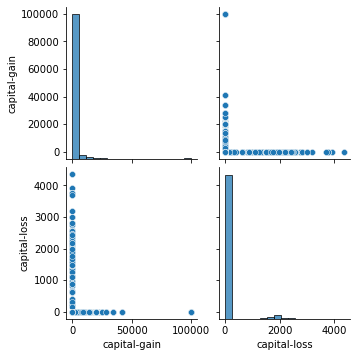

In [14]:
import seaborn as sns
sns.pairplot(train[['capital-gain', 'capital-loss']])

### STEPS
1. fill workcalss and occupation
2. drop Nan 
3. drop educaiton column as educaiton-num is the same thing but in years of learning
4. create capital from capital gain vs capital loss. so capital loss == -ve capital gain


In [15]:
### Preprocessing
def prepocess(df:pd.DataFrame) -> pd.DataFrame:
    df = df[df['native-country'].notna()]
    df.occupation.fillna('undisclosed', inplace=True)
    df.workclass.fillna('undisclosed', inplace=True)
    df = df.drop('education', axis=1) 
    df['capital'] = df['capital-gain'] - df['capital-loss']
    df.drop(['capital-gain', 'capital-loss'], axis=1, inplace=True)

    return df


### Feature enginering

In [16]:
og_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [17]:
train = prepocess(train)
test = prepocess(test)

d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
train.head()

age  workclass  fnlwgt  educational-num      marital-status  \
0   67    Private  366425               16            Divorced   
1   17    Private  244602                8       Never-married   
2   31    Private  174201               13  Married-civ-spouse   
3   58  State-gov  110199                4  Married-civ-spouse   
4   25  State-gov  149248               10       Never-married   

         occupation   relationship   race gender  hours-per-week  \
0   Exec-managerial  Not-in-family  White   Male              60   
1     Other-service      Own-child  White   Male              15   
2   Exec-managerial        Husband  White   Male              40   
3  Transport-moving        Husband  White   Male              40   
4     Other-service  Not-in-family  Black   Male              40   

  native-country  income_>50K  capital  
0  United-States            1    99999  
1  United-States            0        0  
2  United-States            1        0  
3  United-States            0        0  
4  United-States            0        0

In [19]:
test.head()

age         workclass  fnlwgt  educational-num      marital-status  \
0   39  Self-emp-not-inc  327120                9  Married-civ-spouse   
1   32           Private  123253               12  Married-civ-spouse   
2   47           Private  232628                9  Married-civ-spouse   
3   19           Private  374262                8       Never-married   
4   46  Self-emp-not-inc  311231                9  Married-civ-spouse   

          occupation relationship   race gender  hours-per-week  \
0       Craft-repair      Husband  White   Male              40   
1       Craft-repair      Husband  White   Male              42   
2       Craft-repair      Husband  Black   Male              40   
3  Handlers-cleaners    Own-child  White   Male              20   
4    Farming-fishing      Husband  White   Male              40   

  native-country  capital  
0       Portugal        0  
1  United-States        0  
2  United-States        0  
3  United-States        0  
4  United-States        0

In [20]:
train.nunique()

age                   74
workclass              9
fnlwgt             26357
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
hours-per-week        94
native-country        41
income_>50K            2
capital              218
dtype: int64

In [21]:
test.nunique()

age                 61
workclass            6
fnlwgt             878
educational-num     16
marital-status       7
occupation          14
relationship         6
race                 5
gender               2
hours-per-week      62
native-country      29
capital             60
dtype: int64

In [22]:
train.select_dtypes('object').nunique()

workclass          9
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    41
dtype: int64

### STEPS
1. One hot encode classes with less than 10 unique values
2. 

In [23]:
from sklearn.preprocessing import StandardScaler

def oneHotEncoding(df, features_to_encode):
    dummies = pd.get_dummies(df[features_to_encode])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res) 
def OneHotEncodingClasses(df):
    object_based_classes = df.select_dtypes('object')
    features_to_encode = []
    for col in object_based_classes.columns:
        column = object_based_classes[col]
        n_unique = column.nunique()
        # print(f'{col=} has {n_unique=}')
        
        if n_unique < 10:
            features_to_encode.append(col)
    print(f'{features_to_encode=}')
    result = oneHotEncoding(df, features_to_encode)
    return result

def LabelEncodingClasses(df):
    object_based_classes = df.select_dtypes('object')
    features_to_encode = []
    for col in object_based_classes.columns:
        column = object_based_classes[col]
        n_unique = column.nunique()
        # print(f'{col=} has {n_unique=}')
        
        if n_unique > 10:
            features_to_encode.append(col)
    print(f'{features_to_encode=}')
    for col in features_to_encode:
        # label encode the rest of the classes
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    
    return df
    
def feature_enginering(df:pd.DataFrame, train_data:pd.DataFrame = None, y_label = 'income_>50K') -> pd.DataFrame:
    # one hot encode classes with less than 10 uniqe
    df = OneHotEncodingClasses(df)

    # label encode
    df = LabelEncodingClasses(df)
    return df
train2 = train
t = feature_enginering(train2)
t.head()


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


age  fnlwgt  educational-num  occupation  hours-per-week  native-country  \
0   67  366425               16           3              60              38   
1   17  244602                8           7              15              38   
2   31  174201               13           3              40              38   
3   58  110199                4          13              40              38   
4   25  149248               10           7              40              38   

   income_>50K  capital  workclass_Federal-gov  workclass_Local-gov  ...  \
0            1    99999                      0                    0  ...   
1            0        0                      0                    0  ...   
2            1        0                      0                    0  ...   
3            0        0                      0                    0  ...   
4            0        0                      0                    0  ...   

   relationship_Own-child  relationship_Unmarried  relationship_Wife  \
0                       0                       0                  0   
1                       1                       0                  0   
2                       0                       0                  0   
3                       0                       0                  0   
4                       0                       0                  0   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                        0                        0           0           0   
1                        0                        0           0           0   
2                        0                        0           0           0   
3                        0                        0           0           0   
4                        0                        0           1           0   

   race_White  gender_Female  gender_Male  
0           1              0            1  
1           1              0            1  
2           1              0            1  
3           1              0            1  
4           0              0            1  

[5 rows x 37 columns]

### TRAINING


In [24]:
def scale(df_train:pd.DataFrame, df_test:pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    # df_train_with_nemeric = df_train.select_dtypes('number')

    # df_test_with_nemeric = df_test.select_dtypes('number')
    # cols = df_train_with_nemeric.columns
    # df_train_rest = df_train.loc[:, ~df_train.columns.isin(cols)]
    # df_test_rest = df_test.loc[:, ~df_test.columns.isin(cols)]
    # scaler = StandardScaler()
    # scaler.fit(df_train_with_nemeric)
    # train = pd.DataFrame(scaler.transform(df_train_with_nemeric.values))
    # test = pd.DataFrame(scaler.transform(df_test_with_nemeric.values))
    # train.columns = cols
    # test.columns = cols
    df = df_train
    scaler = StandardScaler()
    
    numeric_cols = list(df.dtypes[df.dtypes != 'object'].index)
    scaler.fit_transform(df.loc[:,numeric_cols])
    df.loc[:,numeric_cols] = scaler.transform(df.loc[:,numeric_cols])
    df_test.loc[:, numeric_cols] = scaler.transform(df_test.loc[:,numeric_cols])
    return df, df_test


In [25]:
train = prepocess(og_train)
test = prepocess(og_test)
print(og_test.columns, train.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object') Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income_>50K', 'capital'],
      dtype='object')


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:

### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
print(data.columns)

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income_>50K', 'capital'],
      dtype='object')


In [27]:
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

age  workclass  fnlwgt  educational-num      marital-status  \
25303   52  Local-gov  175339               13  Married-civ-spouse   
25249   18    Private  400616               10       Never-married   
39603   20    Private  386864                6       Never-married   
42774   32    Private  270335               13  Married-civ-spouse   
9598    29    Private  278637               11  Married-civ-spouse   

            occupation    relationship   race gender  hours-per-week  \
25303  Protective-serv         Husband  White   Male              40   
25249     Adm-clerical       Own-child  White   Male              40   
39603    Other-service  Other-relative  White   Male              35   
42774     Adm-clerical  Other-relative  White   Male              40   
9598      Adm-clerical         Husband  White   Male              40   

      native-country  capital  
25303  United-States        0  
25249  United-States        0  
39603         Mexico        0  
42774    Philippines        0  
9598   United-States        0

In [28]:
# scale the data
train, test = scale(X_train, X_test)
train.head()
test.head()

d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


age    workclass    fnlwgt  educational-num marital-status  \
21079  0.614736      Private -0.692877         1.150006       Divorced   
37641 -0.989523      Private -1.098724        -1.190763       Divorced   
32013 -1.062443      Private  0.137090        -0.410507  Never-married   
25860  0.760578      Private -0.019723         1.150006       Divorced   
22458 -0.187393  undisclosed -0.898512         0.369750        Widowed   

              occupation   relationship   race  gender  hours-per-week  \
21079     Prof-specialty      Unmarried  White  Female       -2.931642   
37641              Sales      Own-child  White  Female       -0.030673   
32013  Handlers-cleaners      Own-child  White  Female        0.613987   
25860              Sales  Not-in-family  White  Female        0.775152   
22458        undisclosed  Not-in-family  White  Female       -1.642322   

      native-country   capital  
21079         France -0.131055  
37641  United-States -0.131055  
32013  United-States -0.131055  
25860  United-States -0.131055  
22458  United-States -0.131055

In [29]:
train = feature_enginering(train)
test = feature_enginering(og_test)
train.head()


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['education', 'occupation', 'native-country']


age    fnlwgt  educational-num  occupation  hours-per-week  \
25303  0.979340 -0.136304         1.150006          10       -0.030673   
25249 -1.499969  1.999768        -0.020379           0       -0.030673   
39603 -1.354127  1.869371        -1.580892           7       -0.433585   
42774 -0.479077  0.764446         1.150006           0       -0.030673   
9598  -0.697839  0.843166         0.369750           0       -0.030673   

       native-country   capital  workclass_Federal-gov  workclass_Local-gov  \
25303              38 -0.131055                      0                    1   
25249              38 -0.131055                      0                    0   
39603              25 -0.131055                      0                    0   
42774              29 -0.131055                      0                    0   
9598               38 -0.131055                      0                    0   

       workclass_Never-worked  ...  relationship_Own-child  \
25303                       0  ...                       0   
25249                       0  ...                       1   
39603                       0  ...                       0   
42774                       0  ...                       0   
9598                        0  ...                       0   

       relationship_Unmarried  relationship_Wife  race_Amer-Indian-Eskimo  \
25303                       0                  0                        0   
25249                       0                  0                        0   
39603                       0                  0                        0   
42774                       0                  0                        0   
9598                        0                  0                        0   

       race_Asian-Pac-Islander  race_Black  race_Other  race_White  \
25303                        0           0           0           1   
25249                        0           0           0           1   
39603                        0           0           0           1   
42774                        0           0           0           1   
9598                         0           0           0           1   

       gender_Female  gender_Male  
25303              0            1  
25249              0            1  
39603              0            1  
42774              0            1  
9598               0            1  

[5 rows x 36 columns]

In [30]:
train.columns

Index(['age', 'fnlwgt', 'educational-num', 'occupation', 'hours-per-week',
       'native-country', 'capital', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_undisclosed',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'gender_Female', 'gender_Male'],
      dtype='object')

### Linear Regression Model

In [32]:
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer
X_train = feature_enginering(X_train)
X_test = feature_enginering(X_test)


features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()


In [34]:
log_model.fit(X_train,y_train);4

d:\Apps\anaconda\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:432: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4

In [35]:
log_model.coef_

array([[ 0.38065767,  0.08325317,  0.9544311 ,  0.00201431,  0.37464593,
         0.00555256,  1.72543748,  0.48972918, -0.09243325, -0.00507469,
        -0.05751104,  0.28309706, -0.65119748, -0.25190773, -0.02509467,
        -0.94095162, -0.50432118,  0.08685593,  1.00882495, -0.20973823,
        -0.96002349, -0.34416772, -0.3287745 ,  0.03341897, -0.17566105,
        -0.56588198, -1.1899077 , -0.46810124,  1.11478876, -0.27576928,
        -0.2900318 , -0.44357001, -0.17454191, -0.06743124, -0.97270194,
        -0.27864229]])

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6556
           1       0.72      0.56      0.63      2083

    accuracy                           0.84      8639
   macro avg       0.80      0.74      0.76      8639
weighted avg       0.83      0.84      0.83      8639



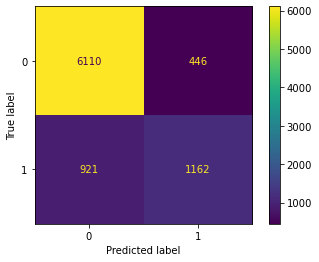

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(X_test)
plot_confusion_matrix(log_model,X_test,y_test)
print(classification_report(y_test, y_pred))

### AUC curves

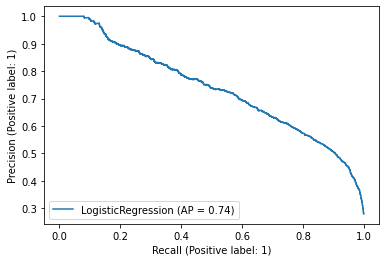

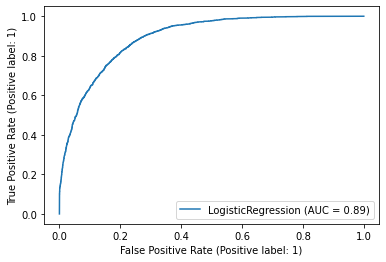

In [37]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve
plot_precision_recall_curve(log_model,X_test,y_test)
plot_roc_curve(log_model,X_test,y_test)

## KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6556
           1       0.72      0.56      0.63      2083

    accuracy                           0.84      8639
   macro avg       0.80      0.74      0.76      8639
weighted avg       0.83      0.84      0.83      8639



## Elbow method

Feature enginnering for SVM

In [41]:
test_error_rates = []


for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred_test = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rates.append(test_error)


Text(0.5, 0, 'K Value')

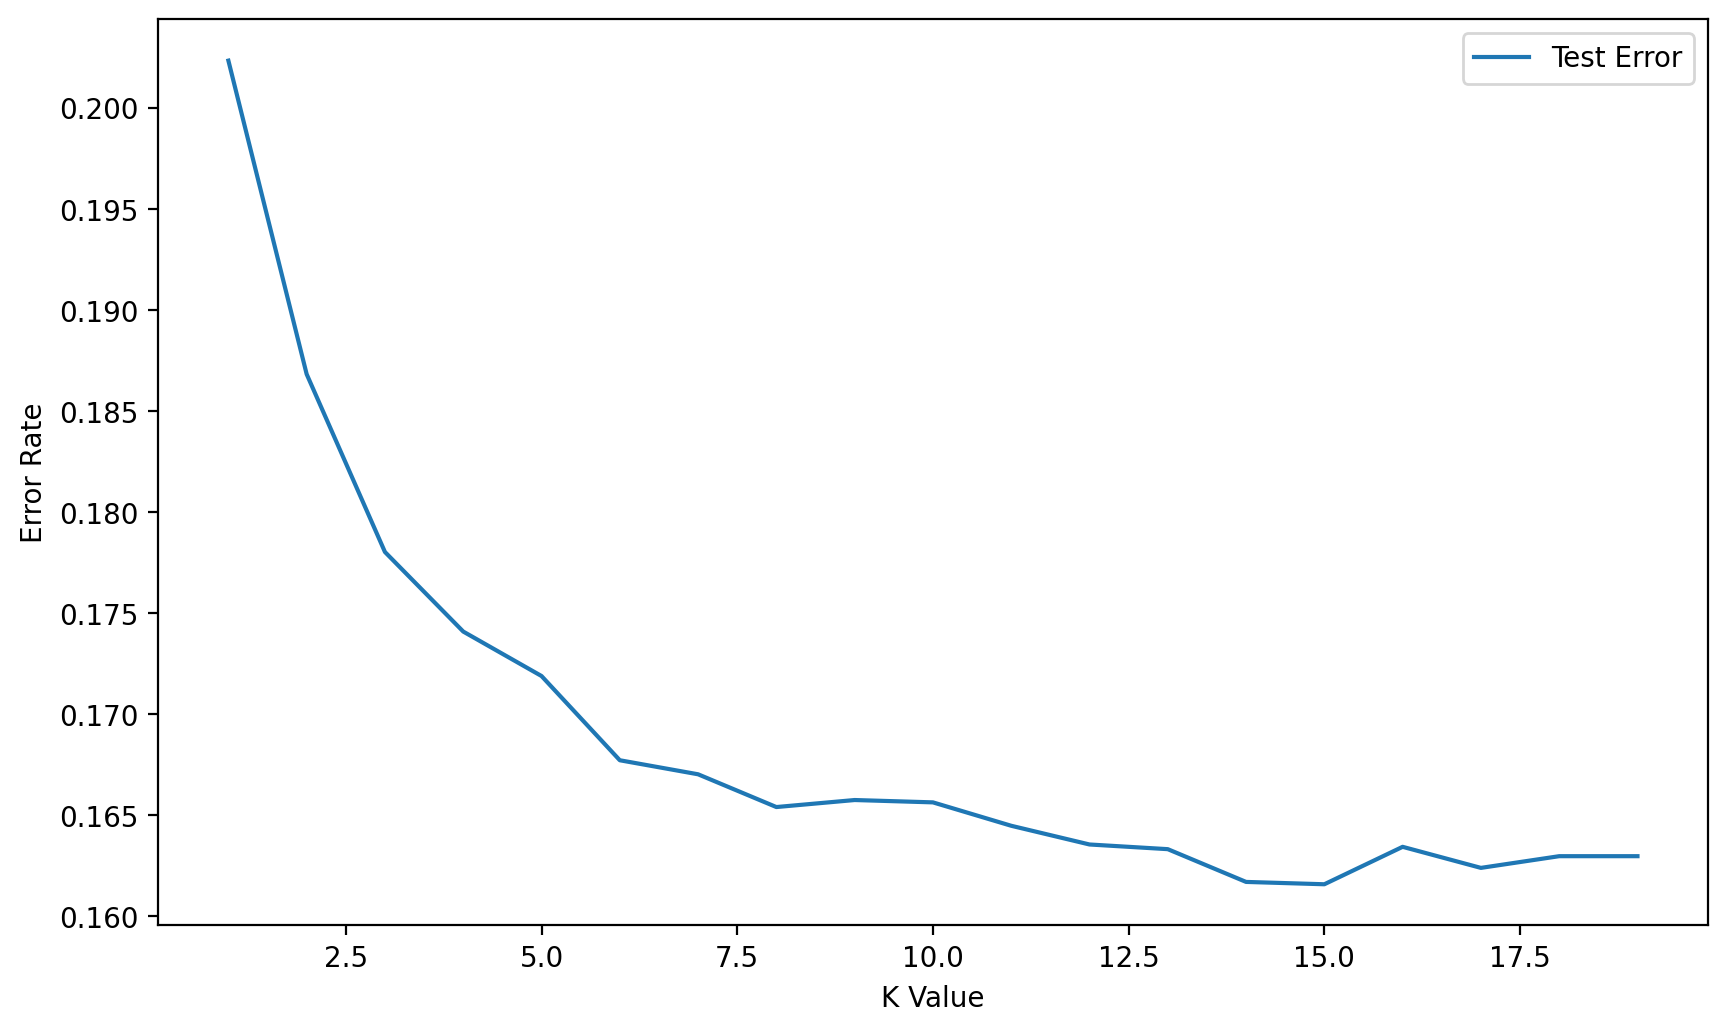

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### CHoose best model

In [43]:
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
knn15 = KNeighborsClassifier(n_neighbors=15)
operations = [('scaler',scaler),('knn15',knn15)]
pipe = Pipeline(operations)


In [44]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn15', KNeighborsClassifier(n_neighbors=15))])

In [45]:
pipe_pred = pipe.predict(X_test)

In [46]:
print(classification_report(y_test, pipe_pred))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6556
           1       0.68      0.54      0.60      2083

    accuracy                           0.83      8639
   macro avg       0.77      0.73      0.75      8639
weighted avg       0.82      0.83      0.82      8639



## SVM MODEL

In [47]:
### ! og_test has no predict column
from sklearn.model_selection import train_test_split
data = prepocess(og_train)
label = 'income_>50K'
y = data[label]
X = data.drop(label, axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# scale the data
X_train, X_test = scale(X_train, X_test)
# feautre engineer
X_train = feature_enginering(X_train)
X_test = feature_enginering(X_test)

features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']
features_to_encode=['workclass', 'marital-status', 'relationship', 'race', 'gender']
features_to_encode=['occupation', 'native-country']


d:\Apps\anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
d:\Apps\anaconda\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

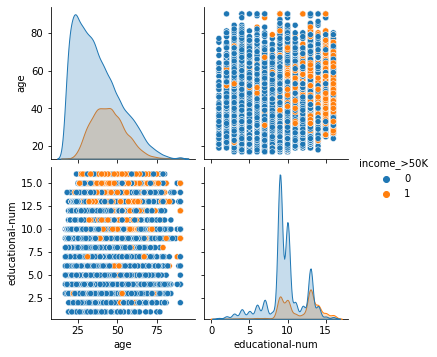

In [48]:
sns.pairplot(data[['age', 'educational-num', 'income_>50K']], hue="income_>50K")

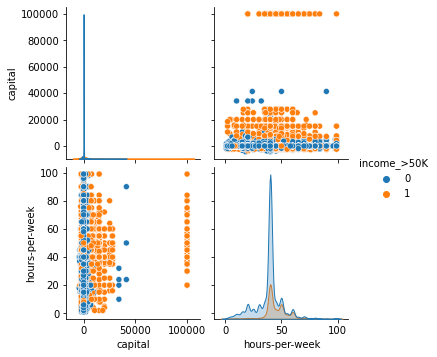

In [49]:
sns.pairplot(data[[ 'capital', 'hours-per-week','income_>50K']], hue="income_>50K")

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
sb = sns
import matplotlib.pyplot as plt
sb.set_theme(style='ticks')

In [51]:
from sklearn.svm import SVC  # Supprt Vector Classifier
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm, param_grid)
# Note again we didn't split Train|Test
grid.fit(X_train, y_train)
# 100% accuracy (as expected)
grid.best_score_
print(f'best_score:{grid.best_score_}, params: {grid.best_params_}')


best_score:0.8415569382144408, params: {'C': 1, 'kernel': 'linear'}


best_score:0.8415569382144408, params: {'C': 1, 'kernel': 'linear'}


In [53]:
res = pd.DataFrame(grid.cv_results_)
res

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.177251      0.156257         0.130489        0.005580    0.01   
1       0.929750      0.182252         0.097291        0.018989    0.01   
2       2.924952      0.150137         0.126206        0.002686     0.1   
3       2.575080      0.407363         0.162749        0.021542     0.1   
4       6.920090      0.855936         0.131872        0.009461       1   
5       1.877320      0.115653         0.136021        0.010562       1   

  param_kernel                           params  split0_test_score  \
0       linear  {'C': 0.01, 'kernel': 'linear'}           0.840399   
1          rbf     {'C': 0.01, 'kernel': 'rbf'}           0.579511   
2       linear   {'C': 0.1, 'kernel': 'linear'}           0.842280   
3          rbf      {'C': 0.1, 'kernel': 'rbf'}           0.765012   
4       linear     {'C': 1, 'kernel': 'linear'}           0.843004   
5          rbf        {'C': 1, 'kernel': 'rbf'}           0.831139   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.841268           0.844596           0.841557           0.838663   
1           0.557083           0.594125           0.753726           0.597743   
2           0.840833           0.843872           0.841702           0.838229   
3           0.766025           0.766025           0.766025           0.766893   
4           0.840978           0.844306           0.841557           0.837940   
5           0.834901           0.837650           0.832586           0.835480   

   mean_test_score  std_test_score  rank_test_score  
0         0.841296        0.001934                3  
1         0.616438        0.070117                6  
2         0.841383        0.001863                2  
3         0.765996        0.000596                5  
4         0.841557        0.002148                1  
5         0.834351        0.002276                4

In [54]:
grid.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>

In [55]:
ans = grid.predict(X_test)

ValueError: X has 35 features, but SVC is expecting 36 features as input.

In [ ]:
import sklearn
err = sklearn.metrics.mean_squared_error(y_test, ans)
acc = 1- err
print(err, acc)

0.15812015279546243 0.8418798472045376


In [ ]:
print(f'Acheived accuracy: {acc}')

Acheived accuracy: 0.8418798472045376


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

def score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    print(f'accuracy:{acc}', f'presion:{pre}', f'recall:{rec}', f'F1:{f1}', sep='\n')
    print('confucion: matrix')
    print(confusion)

In [ ]:
print(classification_report(y_test,ans))

NameError: name 'classification_report' is not defined